之前的L2的强化学习问题是让智能体通过**互动**了解某个环境。
现在假设智能体**已经知道关于该环境的所有信息**，所以智能体知道该环境如何决定下个状态。  
  在动态规划设置中，智能体完全了解表示环境特性的马尔可夫决策流程 (MDP)。（这比强化学习设置简单多了，在强化学习设置中，智能体一开始不知道环境如何决定状态和奖励，必须完全通过互动学习如何选择动作。）

这节课介绍了该教科书的第 4 章（尤其是第 4.1-4.4 部分）的内容。

## 动态规划
通过不断评估和改进找到最优策略。（策略迭代）


给定某个策略对应的值函数，提出更好（或对等）的策略。（策略改进）


计算随机策略对应的值函数。（迭代策略评估）


通过不断评估和改进找到最优策略（在遍历整个状态空间一次后停止评估步骤）。【值迭代】
### 迭代方法
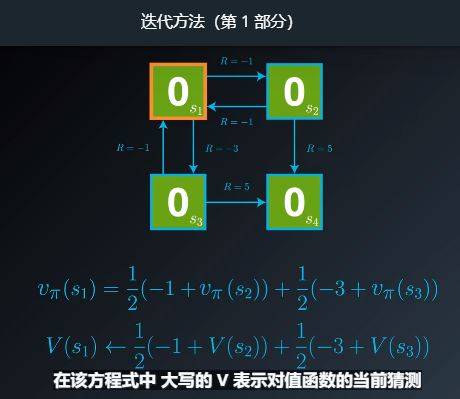
不用直接求方程组的解，先猜测每个状态的值，通常先将每个状态的值设为0，不断的迭代更新，直到最后的准确值。

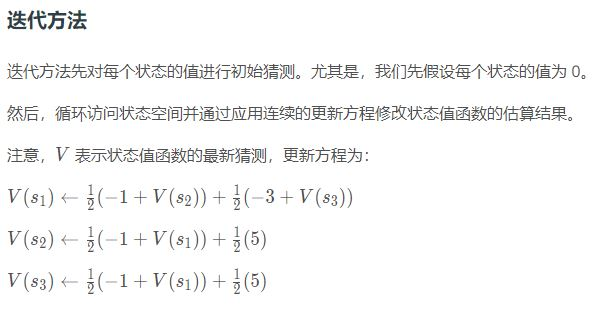

### 迭代策略评估
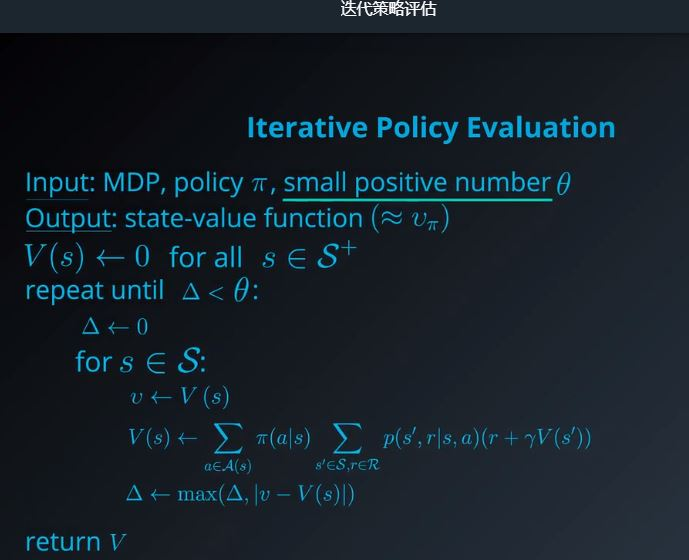
1、将值函数的初始猜测全设为0，然后迭代循环
2，在每一步应用贝尔曼更新法则，检查每个状态的值变化幅度。
变化幅度小于初设设置的0 ，则停止。

注意：只要对于每个状态 $ s\in\mathcal{S}，v_\pi(s)$ 是有限的，策略评估就保证会收敛于策略 $\pi$ 对应的状态值函数。对于有限的马尔可夫决策流程 (MDP)，只要满足以下条件之一，就保证会收敛：
- $\gamma < 1$ 或  
- 如果智能体以任何状态$ s\in\mathcal{S}$ 开始，并且遵守 $\pi$，就保证会最终达到终止状态。


**关于收敛条件的其他注释**
为了直观地了解收敛条件_为何_很合理，思考下两个条件都不满足的情形，因此：  
- $\gamma = 1$ ，以及  
- 具有状态 $s \in \mathcal{S} $，如果智能体从该状态开始，则遵守策略 $\pi$ 的话，它将始终不会遇到终止状态。  
在这种情况下，
- 奖励没有折扣
- 某个阶段可能永远不会结束。
  
那么迭代策略评估可能不会收敛，这是因为状态值函数可能定义不合理！为此，注意在此情形下，计算状态值可能需要将无穷多的（预期）奖励相加，和可能不会收敛。

我们来举一个具体的例子，假设某个 MDP：
- 具有两个状态 $s_1$ 和 $s_2 $ ，其中 $s_2$ 是终止状态
- 具有一个动作 a（_注意：只有一个动作的 MDP 还可以称之为马尔可夫奖励流程 (MRP)。_）
- $p(s_1,1|s_1, a) = 1$

在这种情况下，假设智能体的策略 $\pi$ 是仅“选择”可以执行的动作，因此$ \pi(s_1)=a$。假设 $\gamma = 1 $。根据一步动态特性，如果智能体从状态 $s_1$开始，它将始终保持该状态，永远不会遇到终止状态 $s_2$。  
在这种情况下，$v_\pi(s_1)$定义不合理。为此，注意 $v_\pi(s_1)$ 是经历状态$ s_1$
之后的（预期）回报，并且

$v_\pi(s_1) = 1 + 1 + 1 + 1 + ...$

发散为正无穷。（请花时间消化这段内容，并明白如果在此示例中，其中一个条件满足了，那么 $v_\pi(s_1)$将定义合理。作为可选下一步，如果你想从数学角度满足这一条件，建议你复习几何级数和负二项分布。）

### 动作值
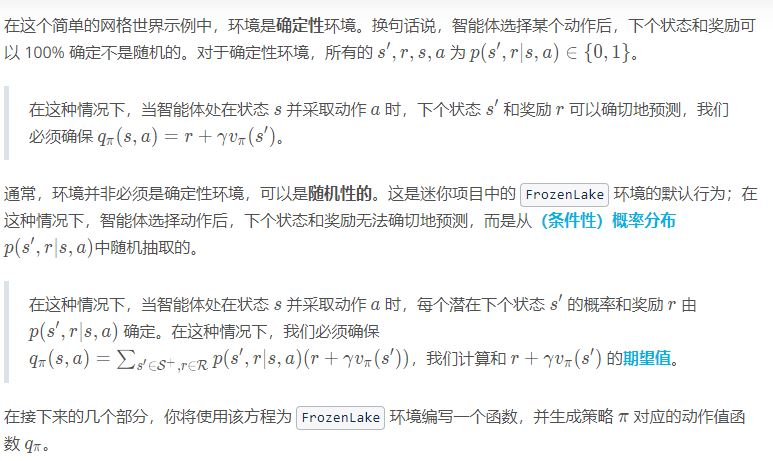


### 策略改进 policy improvement（又称：策略完善）
该算法使用策略的**值函数**，提出一个至少和当前策略一样好的新策略。
通过策略评估和策略完善的结合，策略评估获得一个策略并生成值函数。然后使用该值函数得到**动作值函数**和策略完善方法，获得一个潜在的完善的新策略。然后带入该新策略。
  再次进行策略评估，然后进行策略完善，不断重复，直到**收敛于最优策略**。  
 在上一节课**动作值**，你学到了以下知识：如果给定策略 $\pi$ 对应的动作值函数 $q_\pi$的估值 Q，可以构建一个改进（或对等）的策略 $\pi'$ ，其中 $ \pi'\geq\pi$。

对于每个状态$ s\in\mathcal{S}$，你只需选择最大化动作值函数估值的动作。换句话说，

$\pi'(s) = \arg\max_{a\in\mathcal{A}(s)}Q(s,a)$，针对所有 $s\in\mathcal{S}$。

你可以在下方找到策略改进的完整伪代码：
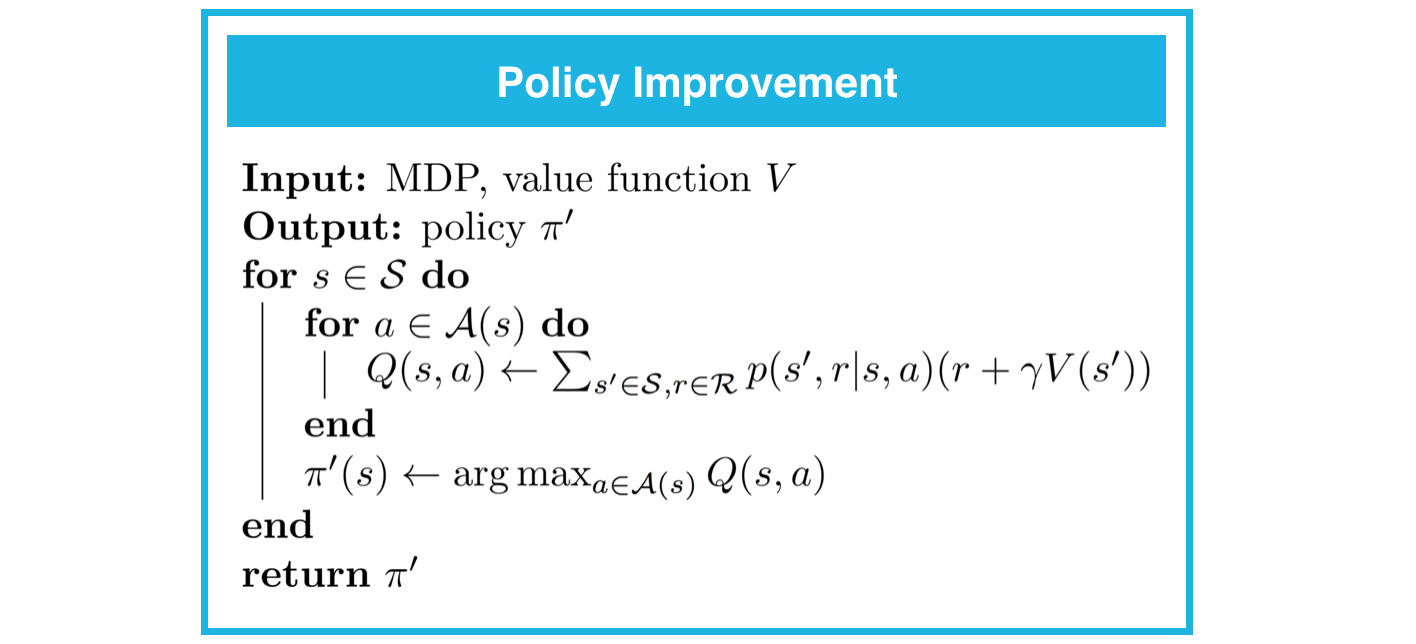

如果对于某个状态 $s\in\mathcal{S}$，其 $\arg\max_{a\in\mathcal{A}(s)}Q(s,a)argmax 
a∈A(s)$不是唯一的，则可以灵活地构建改进策略 $\pi'$。

实际上，只要策略 $\pi'$  对于每个$ s\in\mathcal{S}$ 和 $a\in\mathcal{A}(s)$ 都满足：

$\pi'(a|s) = 0$ 如果$ a \notin \arg\max_{a'\in\mathcal{A}(s)}Q(s,a')$，

它是改进策略。换句话说，（对于每个状态）任何策略只要为不会最大化动作值函数估值的动作分配概率 0，则对该状态来说就是改进策略。你可以在自己的实现中随意实验这一点！




### 策略迭代
策略迭代，即一系列的策略评估和改进步骤。策略迭代肯定会用有限次数的迭代找到任何有限马尔可夫决策流程 (MDP) 的最优策略。你可以在下方找到伪代码。
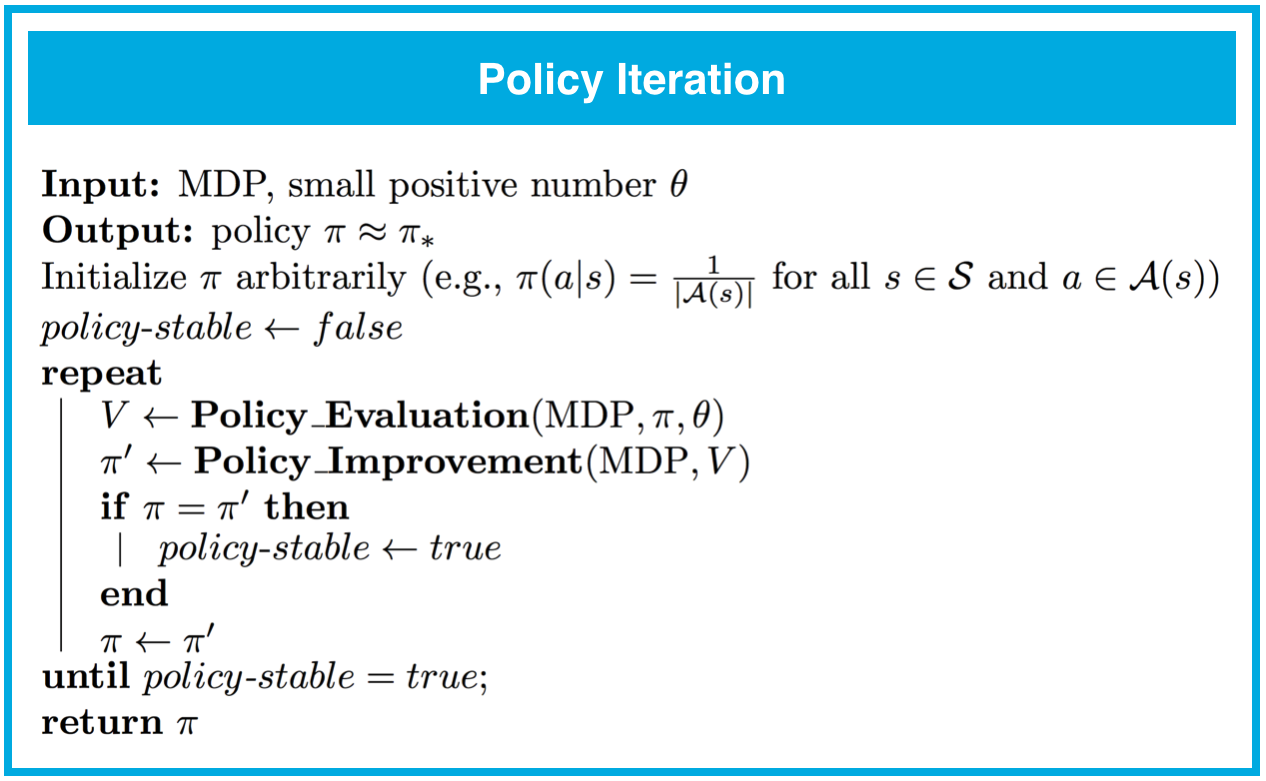


### 截断策略迭代 trucated policy iteration
策略评估是一种迭代算法，且依赖于贝尔曼更新规则，完成一轮评估，有你所设置的小数字$\theta $决定，要是使估算的值函数与真正的值函数接近，就要使这个超参数$\theta$越小，$\theta$越小，耗费时间越长。  


能够不再使用这个停止条件终止算法？，而是设定我们愿意计算的绝对迭代次数，达到某个正整数后，终止该算法。    
> 对整个状态空间，执行有限次数的策略评估步骤。（即：我们将每个状态的估算值更新次数限定为一定的数量，然后再进行策略完善。）

原理是如果我们的目标是获得最优策略。。。

迭代性）策略评估会根据需要应用很多次贝尔曼更新步骤，以实现收敛，而截断策略迭代仅对整个状态空间执行固定次数的评估。 下方找到伪代码：

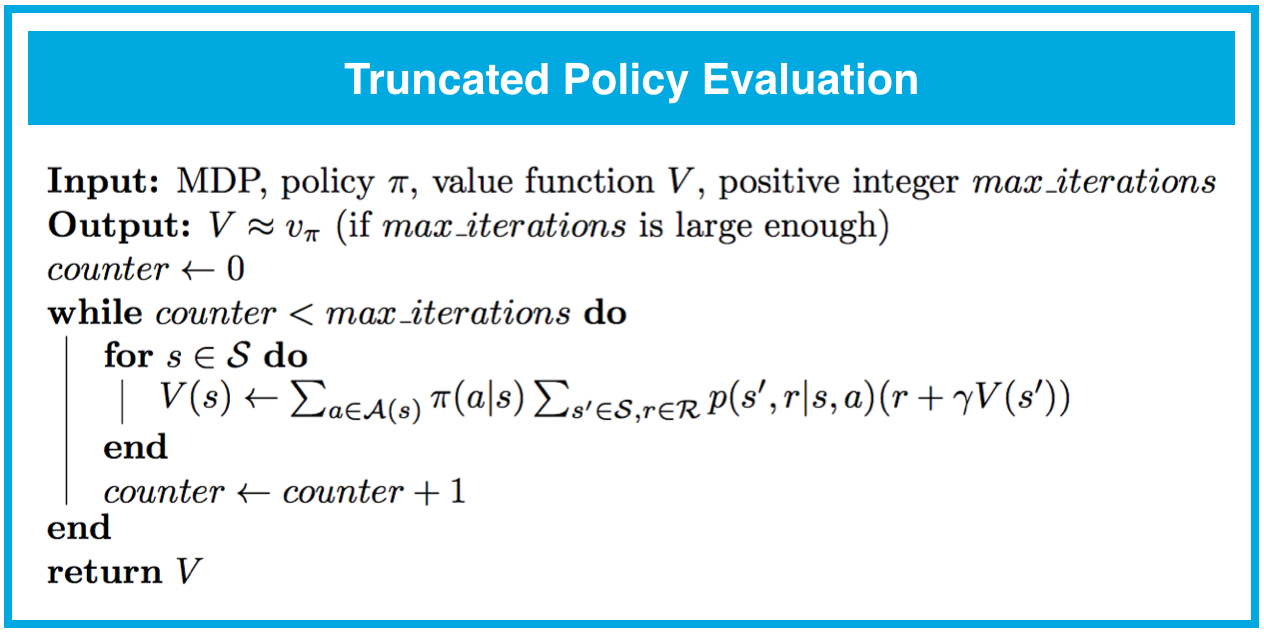
我们可以将这个修订后的策略评估算法应用到类似于策略评估的算法中，称之为截断策略迭代。

你可以在下方找到伪代码。
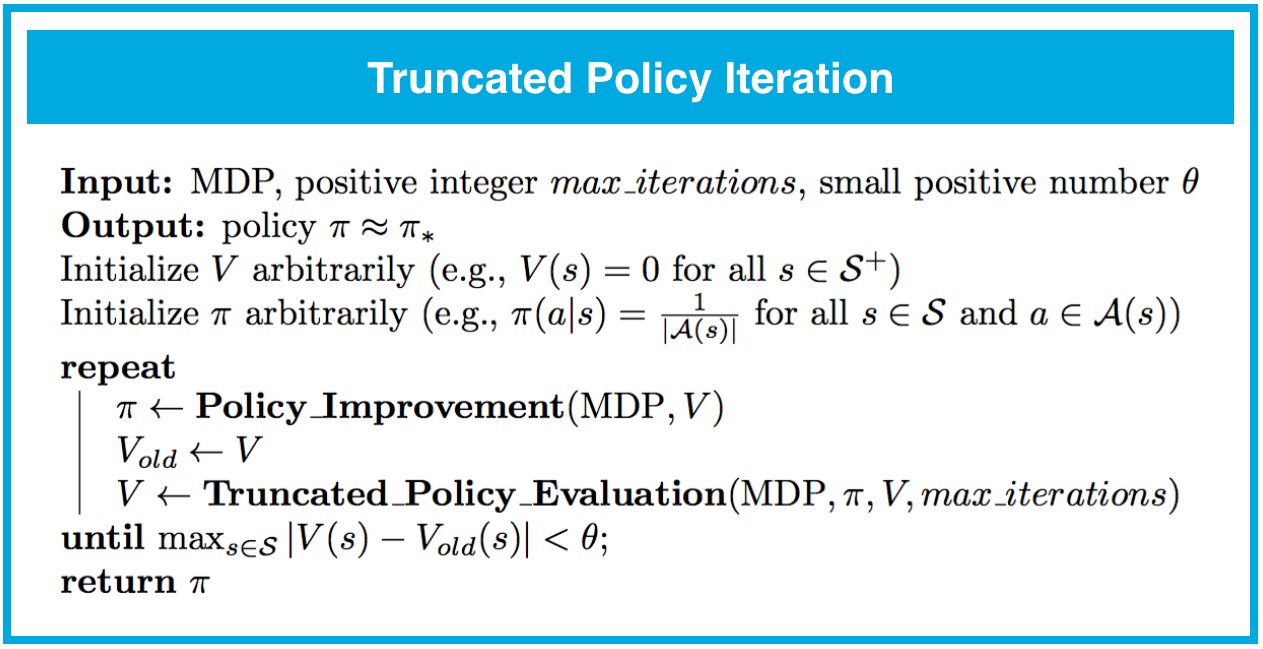

你可能还注意到，截断策略迭代的停止条件与策略迭代的不同。在策略迭代中，当策略在一次策略改进步骤之后没有变化时，我们将终止循环。在截断策略迭代中，仅当值函数估值收敛时，我们才停止循环。

强烈建议你尝试两种停止条件，以便熟练掌握这些知识。但是，我们发现如果超参数 max_iterations 设得太小，则无法检查策略是否更改了。（为此，思考下以下情形：假设 max_iterations 设为很小的值。如果算法完全没有收敛于最优值函数 $v_*$ 或最优策略 $\pi_*$，可以想象，对值函数估值 VV 的更新可能会太小，导致相应的策略没有任何更新。）


### 值迭代
在循环一次后停止策略评估步骤。  
在此算法中，对状态空间的每次遍历都会进行策略评估和策略改进。值迭代肯定会找到任何有限 MDP 的最优策略$ \pi_*。

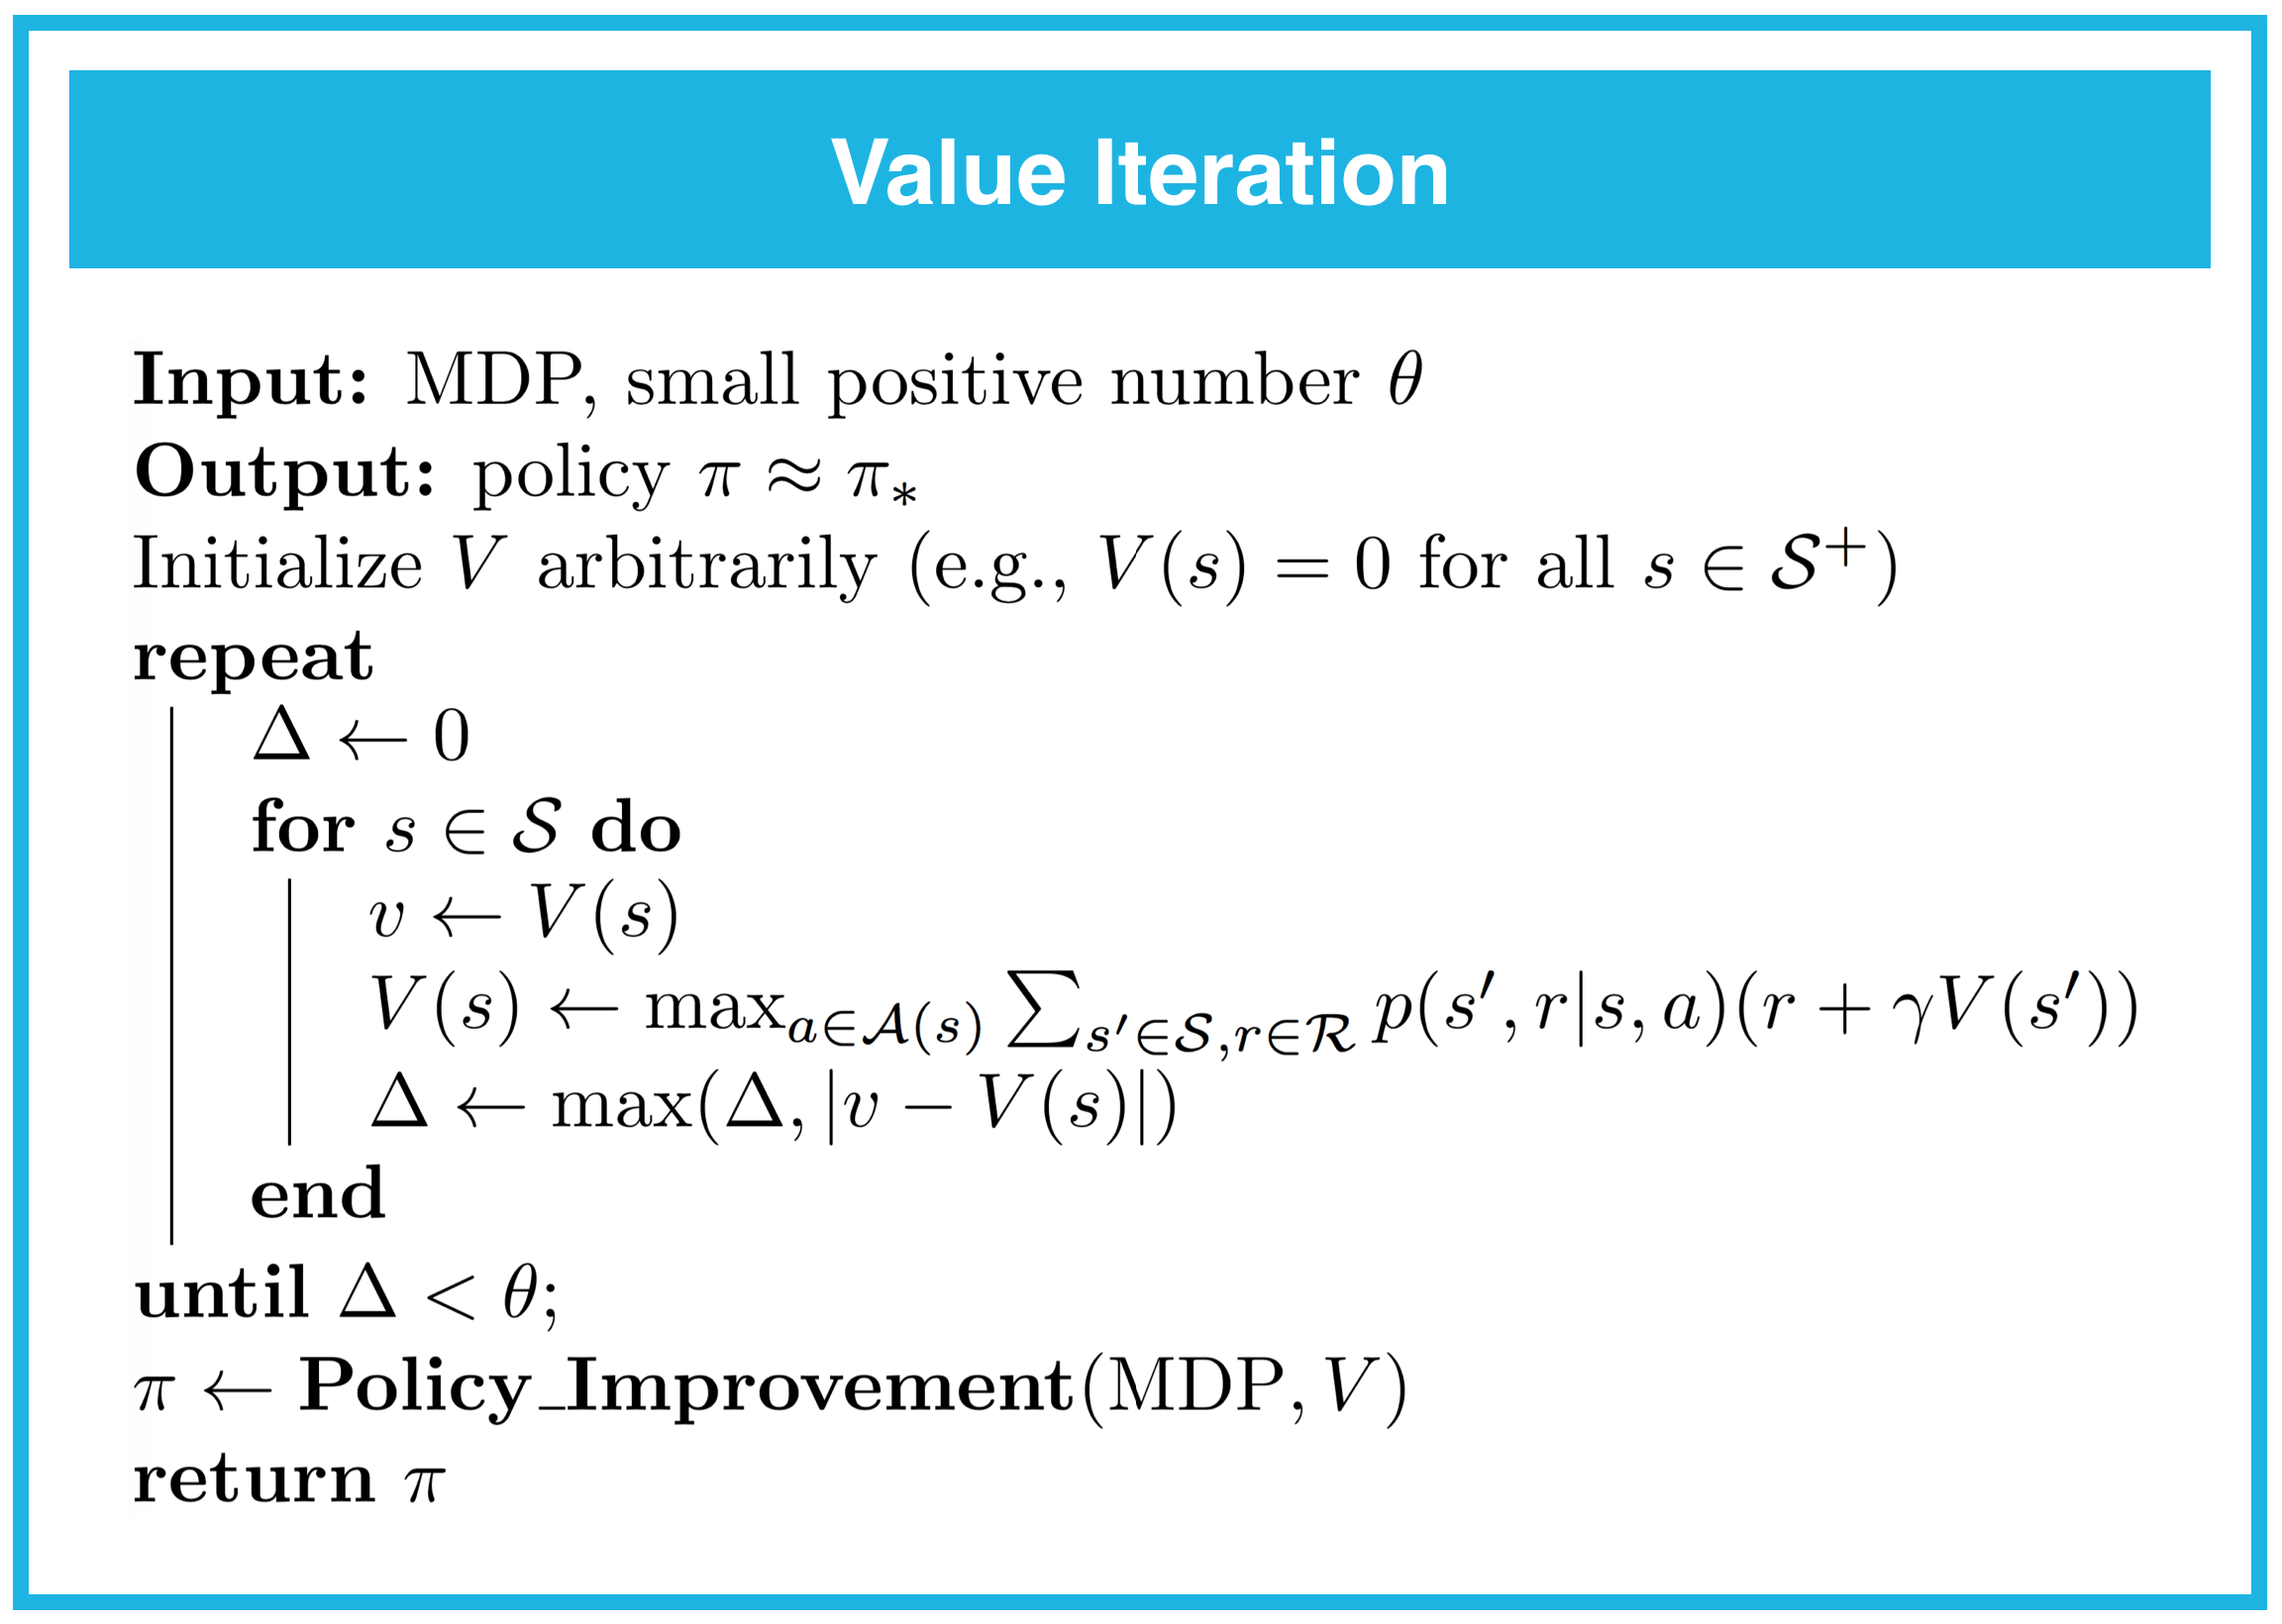

注意，如果后续值函数估值之间的差值很小，则满足了停止条件。尤其是，如果对于每个状态，差值都小于 $\theta$，则循环终止。并且，如果我们希望最终值函数估值与最优值函数越接近，则需要将值 $\theta$ 设得越小。

你可以在你的实现中将$ \theta $ 设成各种值；注意，对于 FrozenLake 环境，1e-8 左右的值似乎很合适。

如果你想详细了解如何设置$ \theta $ 的值，建议阅读[这篇论文](http://www.leemon.com/papers/1993wb2.pdf)，并重点看看 Theorem 3.2。他们的主要结果可以总结如下：  
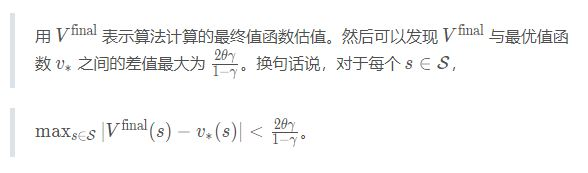
